# Анализ оттока клиентов из банка

**Проанализируйте клиентов регионального банка `Метанпромбанк` и выделите сегменты клиентов,
которые склонны уходить из банка.**

# Материалы:
- **[Презентация](https://disk.yandex.ru/i/BdW8D4DlStEM4A)**

# Задания:

- **Шаг 1. Изучение общей информации**
    - **Сохранить датафрейм в переменную;**
    - **Вывести общую информацию о датафрейме;**
    - **Вывести датафрейм с 15 первыми строками и посмотреть содержимое колонок;**
    - **Написать структуру данных с типами данных и описанием из документа задания, с дополнениями на усмотрение, если описание колонки с её содержимым не явно понятно (дополнить с интервью с заказчиком).**


- **Шаг 2. Предобработка данных**
    - **Изменить шрифт названий колонок, если он не змеиный;**
    - **Проверить наличие дубликатов, описать причину дубликатов и принять решение: обработать или удалить строки с ними;**
    - **Проверить наличие пропусков, попробовать найти закономерности для их заполнения, чтобы не было искажения данных, если не получится: поставить "заглушки" или удалить строки с ними на усмотрение;**
    - **Проверить наличие аномальных значений, обработать или удалить строки с ними;**
    - **Изменить тип данных колонок при необходимости;**
    - **Преобразовать строковые значения в категориях в числовые (например, Мурманск - 0/1, Москва - 1/0);**
    - **Проверить, у всех ли клиентов минимум 1 продукт в банке. По правилам человек не может быть клиентом банка, пока не откроет какой-либо продукт;**
    - **Узнать долю потери данных при предобработке (если было удаление строк), и вывести число, сколько осталось клиентов в данных;**
    - **Написать вывод по предобработке данных и структуру данных после предобработки.**


- **Шаг 3. Исследовательский анализ данных**
    - **Вывести количество клиентов группы оттока и оставшихся клиентов;**
    - **Определить, в каком промежутке чаще всего встречаются клиенты группы оттока по столбцам:**
        - **Баланса;**
        - **Баллов кредитного скоринга;**
        - **Возраста;**
        - **Оценочного дохода.**
    - **Сравнить среднее значение оттока всего банка со средним оттоком по:**
        - **Городу;**
        - **Полу;**
        - **Баллам собственности;**
        - **Количеству продуктов;**
        - **Наличию кредитной карты.**
    - **Исследовать зависимость оттока. Дополнительно изучить возможные зависимости всех столбцов группы оттока и группы клиентов, которые остались;**
    - **Написать вывод по исследовательскому анализу данных.**


- **Шаг 4. Проверка гипотез**
    - **Рассчитать 99.5-й процентиль по всем данным отдельно по столбцам баланса и оценочной зарплаты, вырезать все строки со значениями выше них, сохранить такой датафрейм в отдельную переменную для проверки гипотез. Также вывести долю потери данных;**
    - **Тесты со сравнением долей:**
        - **Одинаковая ли доля наличия кредитных карт в группе "Оттока" и группе остальных клиентов? Визуализировать доли наличия кредитных карт по каждой группе.**
    - **Тесты со сравнением среднего:**
        - **Одинаковый ли средний баланс клиентов между группой "Оттока" и остальными клиентами?**
        - **Одинаковый ли средний оценочный доход клиентов между группой "Оттока" и остальными клиентами?**
        - **Одинаковые ли средние баллы кредитного скоринга клиентов между группой "Оттока" и остальными клиентами?**
        - **Визуализировать средние показатели по тестам, в которых группы различны.**
    - **Аргументировать применение определенных методов теста;**
    - **На усмотрение провести ещё тесты, если во время выполнений заданий возникнут дополнительные "намёки" на различия групп по явным или неявным параметрам;**
    - **Написать вывод по проверке гипотез.**


- **Шаг 5. Подведение промежуточных итогов**
    - **Составить промежуточный вывод на основе исследовательского анализа данных и проверки гипотез.**       


- **Шаг 6. Сегментация клиентов по признакам отточности**
    - **Выбрать сегменты (от 500 клиентов на сегмент), по которым среднее количество оттока больше, чем в среднем оттока по банку.**


- **Шаг 7. Приоритизация сегментов оттока**
    - **Создать приоритет сегментов оттока, аргументировать созданный приоритет.**


- **Шаг 8. Рекомендации для сегментов оттока**
    - **Создать рекомендации для работы с сегментами оттока.**


- **Шаг 9. Создание презентации**
    - **Создать презентацию в формате PDF-файла на основе выполненной работы.**


- **Шаг 10. Вывод по проделанной работе**
    - **Вставить выводы по каждому шагу здесь.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import fisher_exact, mannwhitneyu, levene, ttest_ind

## Шаг 1. Изучение общей информации

### Сохранить датафрейм в переменную.

In [2]:
data = pd.read_csv('/datasets/bank_scrooge.csv')

### Вывести общую информацию о датафрейме.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


### Вывести датафрейм с 15 первыми строками и посмотреть содержимое колонок.

In [4]:
data.head(15)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


### Написать структуру данных с типами данных и описанием из документа задания, с дополнениями на усмотрение, если описание колонки с её содержимым не явно понятно (дополнить с интервью с заказчиком).

**Структура `data`:**
- **USERID** — идентификатор пользователя;
- **score** — баллы кредитного скоринга;
- **city** — город;
- **gender** — пол;
- **age** — возраст;
- **equity** — количество баллов собственности (сколько собственности у клиента, например недвижимость, автомобили и так-далее);
- **balance** — баланс на счёте (текущий баланс клиента на счетах на момент выгрузки данных);
- **products** — количество банковских продуктов;
- **credit_card** — есть ли кредитная карта (булев тип - 0 или 1);
- **last_activity** — активный клиент (заходил ли клиент в личный кабинет или совершал операций за последние 30 дней, булев тип - 0 или 1);
- **EST_SALARY** — оценочный доход клиента;
- **сhurn** — признак оттока (булев тип - 0 или 1).

**Типы данных:**
- **USERID - int64**
- **score - float64**
- **city - object**
- **gender - object**
- **age - float64**
- **equity - int64**
- **balance - float64**
- **products - int64**
- **credit_card - int64**
- **last_activity - int64**
- **EST_SALARY - float64**
- **churn - int64**

## Шаг 2. Предобработка данных

### Изменить шрифт названий колонок, если он не змеиный.

In [5]:
data.columns = data.columns.str.lower().str.replace(' ', '_')

### Проверить наличие дубликатов, описать причину дубликатов и принять решение: обработать или удалить строки с ними.

**Проверим наличие явных дубликатов:**

In [6]:
data.duplicated().sum()

0

**И неявных дубликатов, для проверки возьмём столбец с ID пользователей:**

In [7]:
data['userid'].duplicated().sum()

73

**Посмотрим на данные с одинаковыми ID:**

In [8]:
# Сохраняем Series с ID пользователей-дубликатов.
duplicated_userid = (data.loc[data['userid'].duplicated()])['userid']

# Выводим данные с "оригиналами" ID и их дубликатами, чтобы сравнить данные.
data[data['userid'].isin(duplicated_userid)].sort_values(by='userid').head(14)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
5863,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1
1411,123461,829.0,Ярославль,Ж,59.0,0,96222.44,2,0,1,102771.55,1
8638,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0
8164,124450,859.0,Ярославль,Ж,38.0,6,516811.20,1,1,1,95144.63,1
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0


**Данные пользователей с одинаковыми ID различаются, видно, что это разные люди. Возможно два варианта, почему так могло произойти:**


- **Клиенты могли оставить одинаковые персональные данные при регистрации или оформлении заявки, например, номер телефона, и система назначила им один идентификатор на основе таких совпадений;**
- **Произошла техническая ошибка при выгрузке данных и ID "задвоились" в случайном порядке.**


**Оставляем дубликаты по ID пользователей как есть - это разные клиенты. Удаляем столбец с ID:**

In [9]:
data = data.drop(columns='userid')

### Проверить наличие пропусков, попробовать найти закономерности для их заполнения, чтобы не было искажения данных, если не получится: поставить "заглушки" или удалить строки с ними на усмотрение.

**Проверяем наличие пропусков:**

In [10]:
data.isna().sum()

score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

**Разберём пропуски по порядку.**

**`age` - точно не можем сказать, почему возникли пропуски, так-как такие данные клиентов должны быть. Вероятно выгрузка данных произошла не идеально.**

**Поставим на пропуски заглушку -1:**

In [11]:
data['age'] = data['age'].fillna(-1)

**`balance` - Вероятно пропуск в балансе может означать, что у клиента нет открытого счёта или неидеальность выгрузки данных. Проверим клиентов, у которых 0 открытых продуктов:**

In [12]:
data.query('products < 1')

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1


**Вырезаем такую строку, так-как человек не может быть клиентом банка, пока не откроет минимум один продукт. Перед этим сохраняем количество данных, чтобы узнать долю потерю данных в конце предобработки.**

In [13]:
# Сохраняем количество строк перед удалением данных.
before_data_count = data['score'].count()

# Вырезаем клиента, у которого 0 продуктов в банке.
data = data.query('products >= 1')

**Попробуем выявить зависимость пропусков в балансе:**

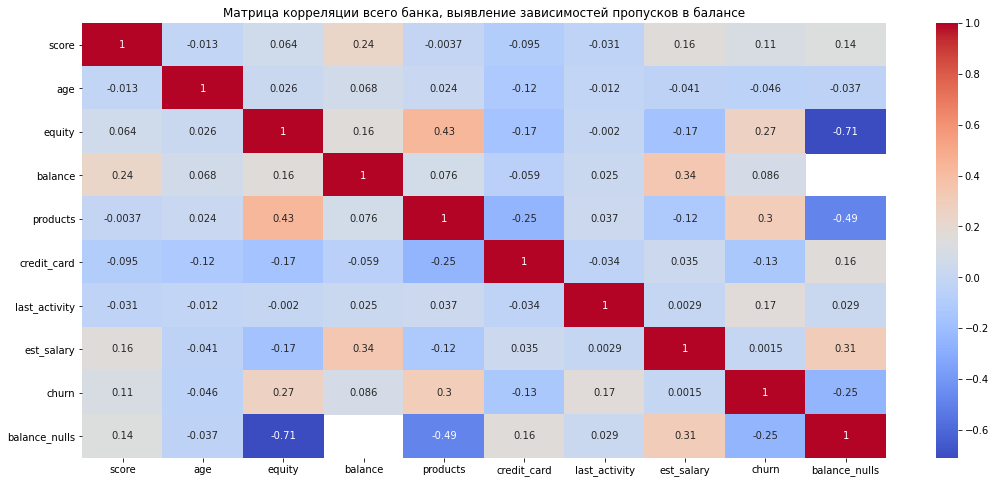

In [14]:
def nulls_category(value):
    """Функция для проверки наличия пропусков в столбце.
    Может использоваться в аргументе .apply().
    Возвращает значения:
    1 - есть пропуск в ячейке;
    0 - нету пропуска в ячейке.
    """
    if pd.isna(value):
        return 1
    else:
        return 0

def corr_matrix_func(data, title):
    """Функция создаёт и выводит графическую матрицу корреляции.
    Принимает на вход:
    - Датафрейм;
    - Титульное название.
    """
    plt.figure(figsize=(18, 8))
    ax = sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    ax.set_title(title)
    plt.show()
    
    return None

# Создаём категорию balance_nulls, где 0 - ячейка заполнена, 1 - есть пропуск.
data['balance_nulls'] = data['balance'].apply(nulls_category)

# Создаём матрицу корреляции.
corr_matrix_func(data.drop(columns=['city', 'gender']),
                 'Матрица корреляции всего банка, выявление зависимостей пропусков в балансе')

**Есть средняя корреляция по количеству продуктов и высокая по очкам собственности. Проверим, по каким значениям кол-ва продуктов и очкам собственности пропуски возникают чаще всего:**

In [15]:
def category_nulls_count(category, title, x_title):
    """Функция для вывода столбчатых диаграмм с распределением
    клиентов с пропусками и без пропусков в балансе по заданной
    категории на входе. Принимает столбец с категорией, титульное
    название и название оси X.
    """
    # Группируем данные с пропусками по категории.
    nulls_data = (data
                  .pivot_table(index=[category, 'balance_nulls'], aggfunc={'balance_nulls': 'count'})
                  .rename(columns={'balance_nulls': 'count'})
                  .reset_index())
    nulls_data['balance_nulls'] = nulls_data['balance_nulls'].replace({1: 'Пропуски', 0: 'Нету пропусков'})
    
    # Выводим столбчатую диаграмму распределения пропусков по категории.
    fig = px.bar(nulls_data,
                 x=category,
                 y='count',
                 color='balance_nulls',
                 text='count',
                 title=title)
    fig.update_layout(xaxis_title=x_title,
                      yaxis_title='Кол-во клиентов',
                      legend_title='Наличие пропусков в балансе')
    fig.show()
    
    return None

"""GitHub не выводит графики plotly.express, вставлены скриншоты работы кода этой библиотеки."""
## Вызываем функции.
#category_nulls_count('products',
#                     'Распределение клиентов с пропусками в балансе по кол-ву продуктов в банке',
#                     'Кол-во продуктов')
#category_nulls_count('equity',
#                     'Распределение клиентов с пропусками в балансе по баллам собственности',
#                     'Баллы собственности')

'GitHub не выводит графики plotly.express, вставлены скриншоты работы кода этой библиотеки.'

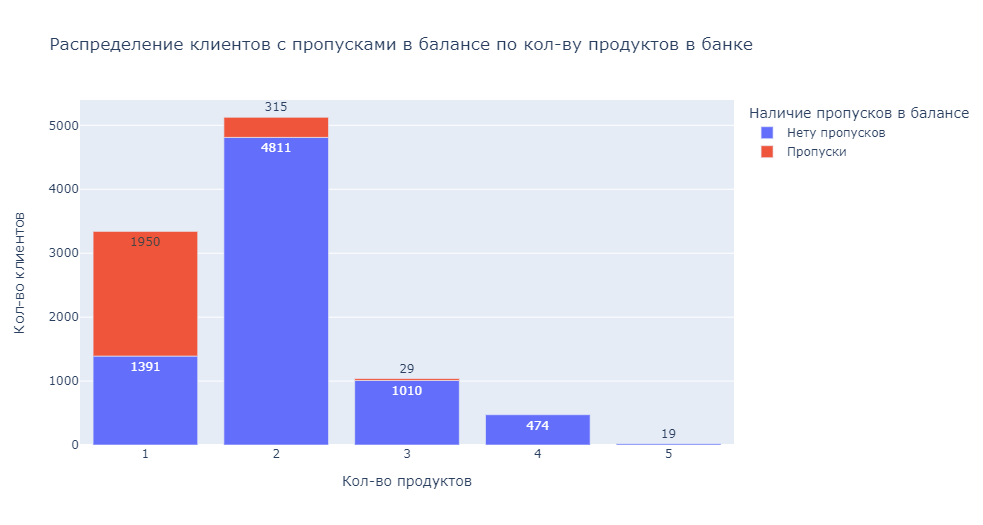

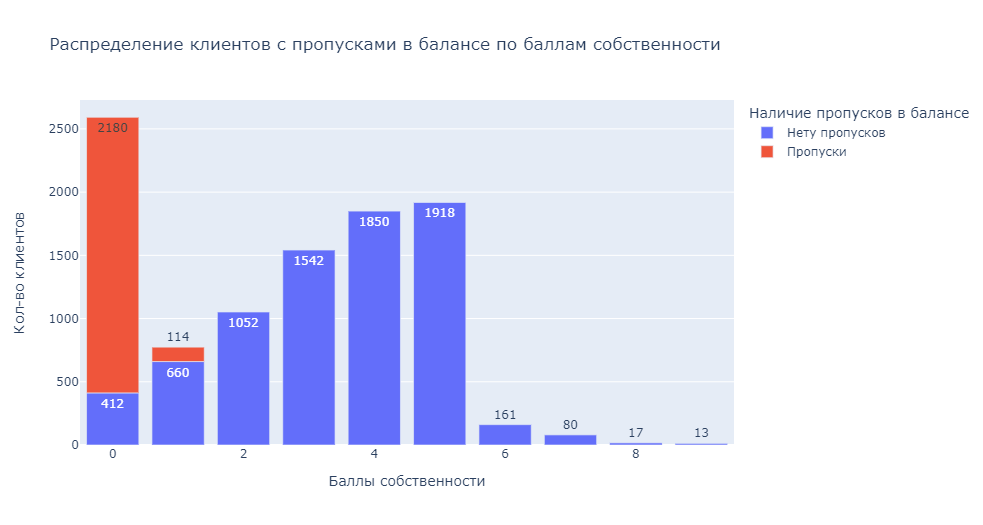

**Чаще всего клиенты с 0 очков собственности имеют пропуски в балансе, явно это один из факторов распределения пропусков, так-как если бы пропуски ставились в случайном порядке, их можно было бы увидеть и на 4-5 очках собственности, но такие клиенты не имеют пропусков.**

**Мы не можем дать точное заполнение пропусков баланса, чтобы не было искажения в распределений данных, по-этому ставим на пропуски заглушку -1:**

In [16]:
data['balance'] = data['balance'].fillna(-1)

**Удаляем столбец для проверки пропусков в балансе:**

In [17]:
data = data.drop(columns='balance_nulls')

### Проверить наличие аномальных значений, обработать или удалить строки с ними.

**Проверим наличие аномальных значений по:**
- **Балансу;**
- **Оценочному доходу.**

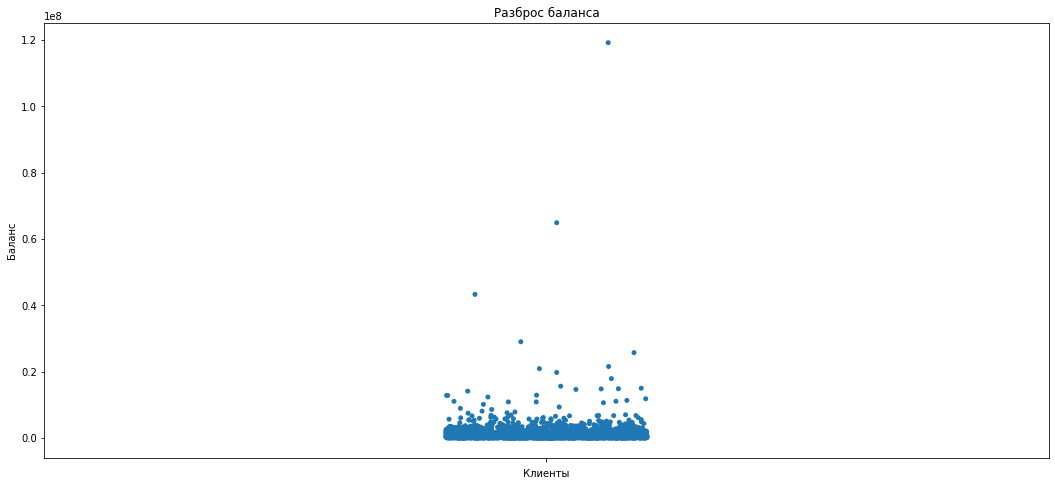

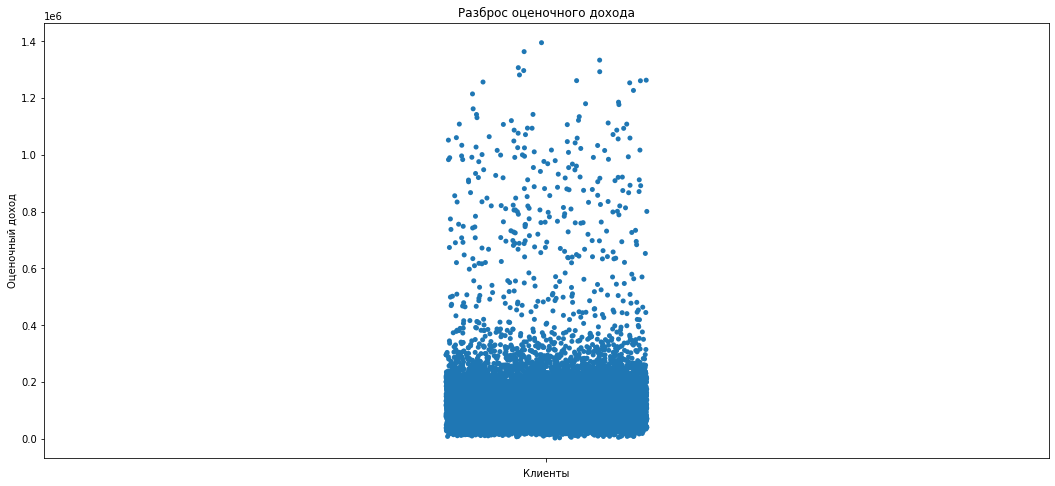

In [18]:
def anomalies_test(column, title, y_label):
    """Функция принимает название колонки, заголовок
    графика и подпись оси Y.
    Выводит график разброса, исключает в графике
    значения -1 по оси Y.
    """
    # Фиксируем маску с заглушками для их удаления в графике.
    mask = data.loc[data[column] == -1]
    
    # Строим график разброса.
    plt.figure(figsize=(18, 8))
    ax = sns.stripplot(y=column, data=data.drop(index=mask.index))
    ax.set_title(title)
    ax.set_xlabel('Клиенты')
    ax.set_ylabel(y_label)
    plt.show()

    return None

# Вызовы функций.
anomalies_test('balance', 'Разброс баланса', 'Баланс')
anomalies_test('est_salary', 'Разброс оценочного дохода', 'Оценочный доход')

**Балансы свыше 40 миллионов создают сильный разброс в данных. Вырезаем такие строки:**

In [19]:
data = data.loc[data['balance'] < 40000000]

**Узнаем минимальные и максимальные значения в баллах кредитного скоринга и возраста:**

In [20]:
print('Минимальные баллы кредитного скоринга:', data['score'].min())
print('Максимальные баллы кредитного скоринга:', data['score'].max())
print('')
print('Минимальный возраст клиентов:', (data.query('age != -1'))['age'].min())
print('Максимальный возраст клиентов:', data['age'].max())

Минимальные баллы кредитного скоринга: 642.0
Максимальные баллы кредитного скоринга: 1000.0

Минимальный возраст клиентов: 18.0
Максимальный возраст клиентов: 86.0


### Изменить тип данных колонок при необходимости.

**Изменим тип данных в `score` и `age` с float на int, так-как в таких столбцах нету десятичных значений.**

In [21]:
data['score'] = data['score'].astype('int')
data['age'] = data['age'].astype('int')

### Преобразовать строковые значения в категориях в числовые.

**Воспользуемся методом get_dummies(), который преобразует отдельные категории в столбцы с булевыми значениями. Сохраним такой датафрейм в отдельную переменную:**

In [22]:
# Создаём датафрейм с преобразованием категории в булевые столбцы.
data_dummies = pd.get_dummies(data, columns=['city', 'gender', 'equity', 'products'])

# Открываем информацию о датафрейме.
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9996 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   score           9996 non-null   int64  
 1   age             9996 non-null   int64  
 2   balance         9996 non-null   float64
 3   credit_card     9996 non-null   int64  
 4   last_activity   9996 non-null   int64  
 5   est_salary      9996 non-null   float64
 6   churn           9996 non-null   int64  
 7   city_Ростов     9996 non-null   uint8  
 8   city_Рыбинск    9996 non-null   uint8  
 9   city_Ярославль  9996 non-null   uint8  
 10  gender_Ж        9996 non-null   uint8  
 11  gender_М        9996 non-null   uint8  
 12  equity_0        9996 non-null   uint8  
 13  equity_1        9996 non-null   uint8  
 14  equity_2        9996 non-null   uint8  
 15  equity_3        9996 non-null   uint8  
 16  equity_4        9996 non-null   uint8  
 17  equity_5        9996 non-null   u

### Проверить, у всех ли клиентов минимум 1 продукт в банке. По правилам человек не может быть клиентом банка, пока не откроет какой-либо продукт.

**Клиент с 0 продуктов в банке был удален ранее, сейчас у всех клиентов минимум один продукт.**

In [23]:
print('Кол-во клиентов после предобработки, у которых меньше 1 продукта в банке:',
      (data.query('products < 1'))['score'].count())

Кол-во клиентов после предобработки, у которых меньше 1 продукта в банке: 0


### Узнать долю потери данных при предобработке (если было удаление строк), и вывести число, сколько осталось клиентов в данных.

In [24]:
print('Доля потери данных при предобработке составила:',
      (before_data_count - data['score'].count()) / before_data_count * 100, '%')

print('')

print('Клиентов в данных осталось:', data['score'].count())

Доля потери данных при предобработке составила: 0.04 %

Клиентов в данных осталось: 9996


### Написать вывод по предобработке данных и структуру данных после предобработки.

- **Шрифт всех колонок `data` теперь змеиный;**


- **Найдены дубликаты по ID пользователей, скорее всего это ошибка при выгрузке данных или система назначила одинаковый ID клиентам, у которых есть совпадения в персональных данных. В данных явно видно, что клиенты с одинаковыми ID разные. Дубликаты были оставлены;**


- **Удалён столбец `userid`;**


- **Обработка пропусков:**
    - **`age` - Пропуски заменены на заглушку -1;**
    - **`balance` - Была найдена возможная закономерность пропусков, что они возникли у клиентов, у которых баллы собственности равны 0 или 1. Пропуски заменены на заглушку -1.**


- **Балансы свыше 40 миллионов создавали сильный разброс в данных и были удалены;**


- **Максимальные и минимальные значения по баллам скоринга и возрасту:**
    - **Минимальные баллы кредитного скоринга: 642**
    - **Максимальные баллы кредитного скоринга: 1000**
    - **Минимальный возраст клиентов: 18**
    - **Максимальный возраст клиентов: 86**


- **Изменён тип данных в `score` и `age` с float на int;**


- **С помощью метода get_dummies() была созданна вторая переменная с датафреймом `data_dummies`, где отдельные категории входят в столбцы с булевыми значениями;**


- **Удалены клиенты, которые не имели продуктов в банке;**


- **Доля потери данных при предобработке составила: 0.04%.**

**Структура `data`:**
- **score** — баллы кредитного скоринга;
- **city** — город;
- **gender** — пол;
- **age** — возраст;
- **equity** — количество баллов собственности (сколько собственности у клиента, например недвижимость, автомобили и так-далее);
- **balance** — баланс на счёте (текущий баланс клиента на счетах на момент выгрузки данных);
- **products** — количество банковских продуктов;
- **credit_card** — есть ли кредитная карта (булев тип - 0 или 1);
- **last_activity** — активный клиент (заходил ли клиент в личный кабинет или совершал операций за последние 30 дней, булев тип - 0 или 1);
- **est_salary** — оценочный доход клиента;
- **сhurn** — признак оттока (булев тип - 0 или 1).

**Типы данных:**
- **score - int64**
- **city - object**
- **gender - object**
- **age - int64**
- **equity - int64**
- **balance - float64**
- **products - int64**
- **credit_card - int64**
- **last_activity - int64**
- **est_salary - float64**
- **churn - int64**

## Шаг 3. Исследовательский анализ данных

### Вывести количество клиентов группы оттока и оставшихся клиентов.

In [25]:
# Группировка данных.
client_churn_counts = (data
                       .pivot_table(index='churn', aggfunc={'churn': 'count'})
                       .rename(columns={'churn': 'count'})
                       .reset_index()
                       .sort_values(by='count'))
client_churn_counts['churn'] = client_churn_counts['churn'].replace({1: 'Отток', 0: 'Оставшийся клиент'})
client_churn_counts['part'] = (client_churn_counts['count'] / (data['score']).count()) * 100

"""GitHub не выводит графики plotly.express, вставлены скриншоты работы кода этой библиотеки."""
## Столбчатая диаграмма.
#fig = px.bar(client_churn_counts,
#             x='churn',
#             y='count',
#             text='count',
#             title='Распределение клиентов по оттоку')
#fig.update_layout(xaxis_title='Клиенты в оттоке или остались',
#                  yaxis_title='Кол-во клиентов')
#fig.show()

# Выводим долю клиентов в оттоке.
print('Доля клиентов в оттоке:', (data['churn'].mean() * 100).round(2), '%')

Доля клиентов в оттоке: 18.19 %


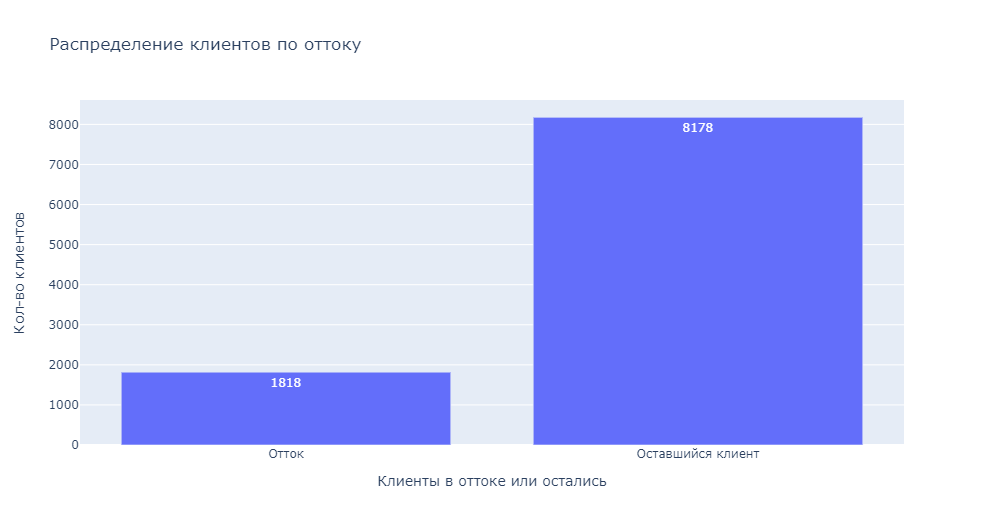

### Определить, в каком промежутке чаще всего встречаются клиенты группы оттока по столбцам:
  - **Баланса**;
  - **Баллов кредитного скоринга;**
  - **Возраста;**
  - **Оценочного дохода.**

/tmp/ipykernel_135/1854747660.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['churn'] = data['churn'].replace({0: 'Оставшиеся клиенты', 1: 'Отток'})


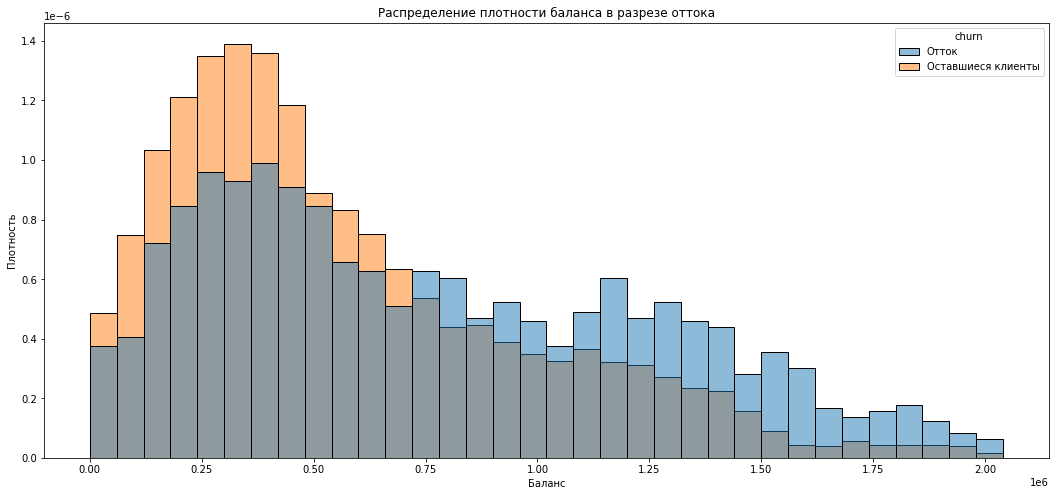

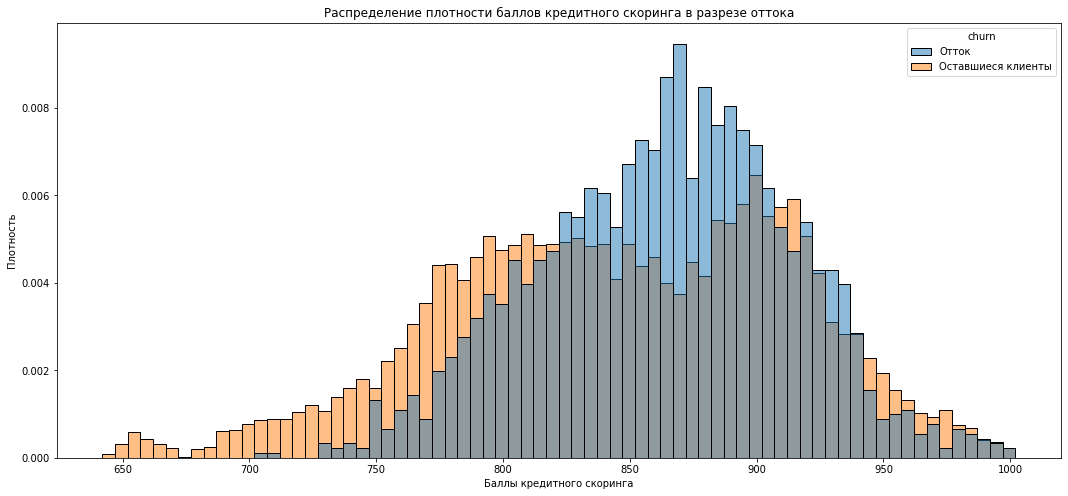

/tmp/ipykernel_135/1854747660.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['churn'] = data['churn'].replace({0: 'Оставшиеся клиенты', 1: 'Отток'})


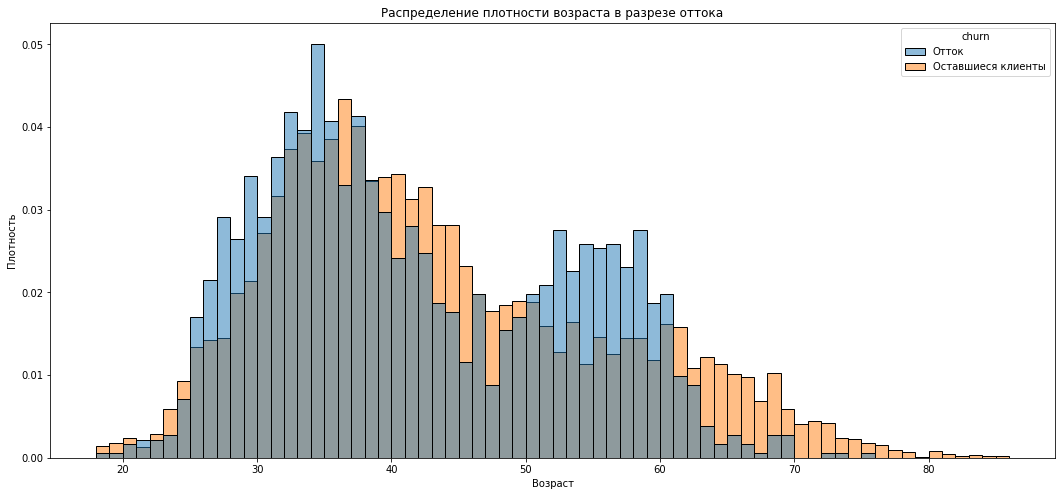

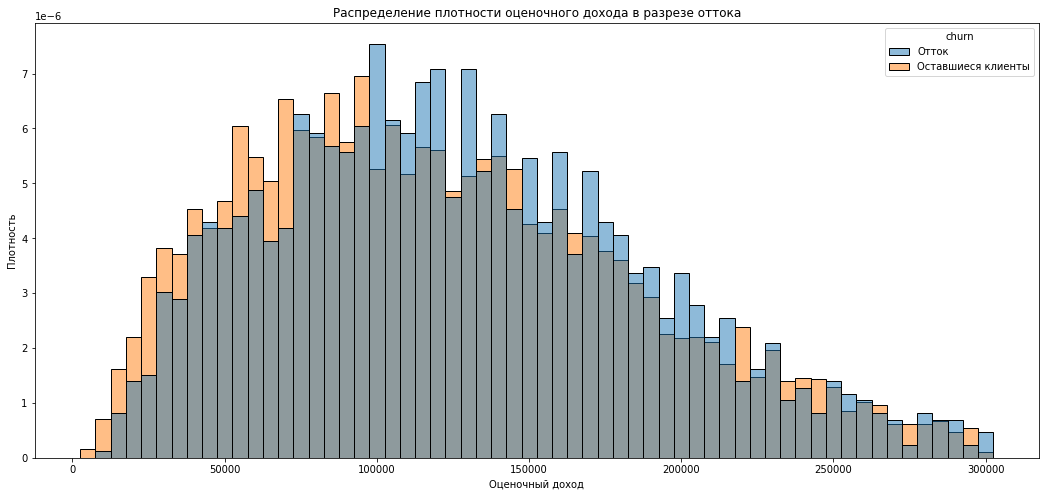

In [26]:
def hist_func(data, column, title, x_title, binwidth=1):
    """Функция для вывода гистограммы плотности
    по группам churn. Вырезает значения -1 по переданному
    column.
    Принимает аргументы:
    - Датафрейм;
    - Столбец, на основе которого будет построена гистограмма;
    - Титульное название гистограммы;
    - Подпись оси X;
    - Видимость корзин (по умолчанию = 1).
    """
    # Вырезаем заглушки.
    data = data.loc[data[column] != -1]
    
    # Переименовываем значения churn.
    data['churn'] = data['churn'].replace({0: 'Оставшиеся клиенты', 1: 'Отток'})
    
    # Построение графика.
    plt.figure(figsize=(18, 8))
    ax = sns.histplot(data=data,
                      x=column,
                      hue='churn',
                      stat='density',
                      common_norm=False,
                      binwidth=binwidth)
    ax.set_title(f'Распределение плотности {title} в разрезе оттока')
    ax.set_xlabel(x_title)
    ax.set_ylabel('Плотность')
    plt.show()
    
    return None

# Вызовы функций.
hist_func(data.query('balance < 2000000'), 'balance', 'баланса', 'Баланс', 60000)
hist_func(data, 'score', 'баллов кредитного скоринга', 'Баллы кредитного скоринга', 5)
hist_func(data, 'age', 'возраста', 'Возраст')
hist_func(data.query('est_salary < 300000'), 'est_salary', 'оценочного дохода', 'Оценочный доход', 5000)

**Распределение плотности оттока, превышающее распределение оставшихся клиентов, наблюдается по параметрам:**
- **Баланс - от 750.000;**
- **Баллы кредитного скоринга - от 825 до 900;**
- **Возраст - от 25 до 35 и от 52 до 60;**
- **Оценочный доход - от 100.000 до 215.000.**

### Сравнить среднее значение оттока всего банка со средним оттоком по:
- **Городу;**
- **Полу;**
- **Баллам собственности;**
- **Количеству продуктов;**
- **Наличию кредитной карты.**

In [27]:
def mean_churn_category(column, title, x_title):
    """Функция строит столбчатую диаграмму с распределением
    среднего оттока по категориям в переданном столбце. Выводит
    на диаграмме горизонтальную линию со средним оттоком по всему
    датафрейму. Принимает аргументы:
    - Название столбца (столбец с категорией);
    - Подпись диаграммы;
    - Подпись оси X.
    """
    # Группируем данные по столбцу с категориями.
    churn_category_mean = (data
                           .pivot_table(index=column, values='churn', aggfunc='mean')
                           .rename(columns={'churn': 'churn_mean'})
                           .reset_index())
    churn_category_mean['churn_mean'] = churn_category_mean['churn_mean'].round(3)
    
    # Находим средний отток по всему банку.
    churn_all_mean = (data['churn'].mean()).round(3)
    
    # Столбчатая диаграмма.
    fig = px.bar(churn_category_mean,
                 x=column,
                 y='churn_mean',
                 title=title)
    fig.update_layout(xaxis_title=x_title,
                      yaxis_title='Средний отток')
    # Добавление линии со средним оттоком по всему банку.
    fig.add_shape(type="line",
                  x0=-1, x1=len(churn_category_mean),
                  y0=churn_all_mean, y1=churn_all_mean,
                  line=dict(color="Red", width=1, dash="dash"))
    fig.add_annotation(x=len(churn_category_mean),
                       y=churn_all_mean,
                       text=f'Ср. отток по всему банку: {churn_all_mean}',
                       showarrow=True,
                       font=dict(color="Red", size=12))
    fig.show()
    
    return None

"""GitHub не выводит графики plotly.express, вставлены скриншоты работы кода этой библиотеки."""
## Вызовы функций.
#mean_churn_category('city', 'Средний отток клиентов по городу', 'Город')
#mean_churn_category('gender', 'Средний отток клиентов по полу', 'Пол')
#mean_churn_category('equity', 'Средний отток клиентов по баллам собственности', 'Баллы собственности')
#mean_churn_category('products', 'Средний отток клиентов по кол-ву продуктов', 'Кол-во продуктов')
#mean_churn_category('credit_card',
#                    'Средний отток клиентов по наличию кредитной карты',
#                    'Наличие кредитной карты (0 - кредитки нет, 1 - кредитка есть)')

'GitHub не выводит графики plotly.express, вставлены скриншоты работы кода этой библиотеки.'

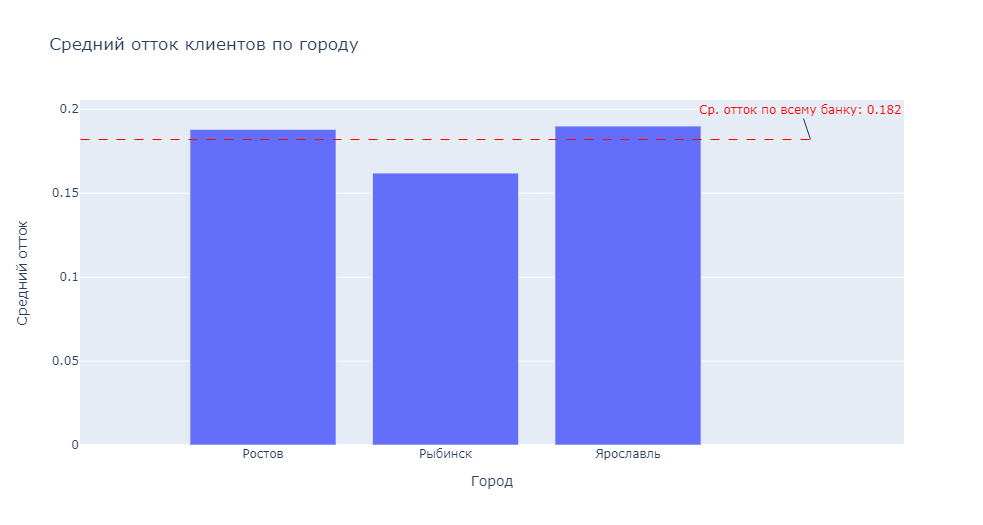

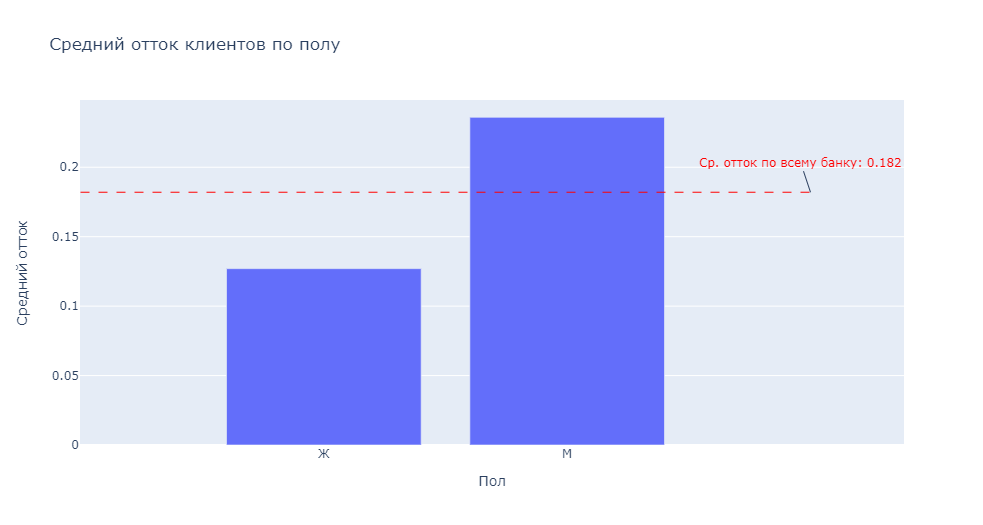

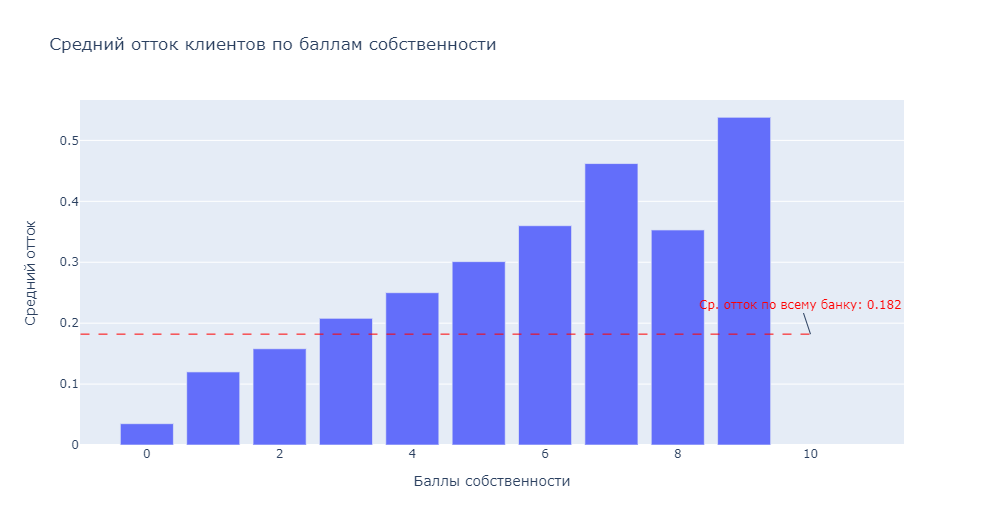

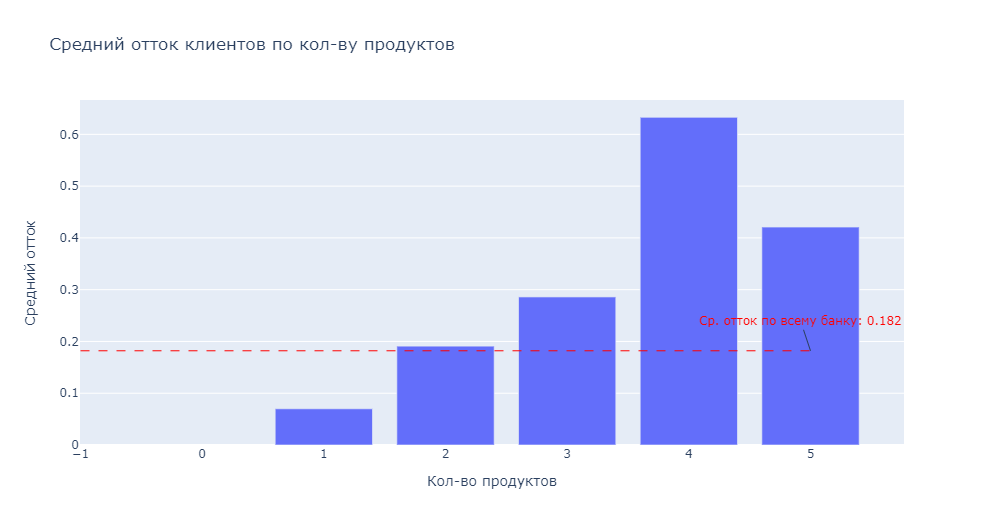

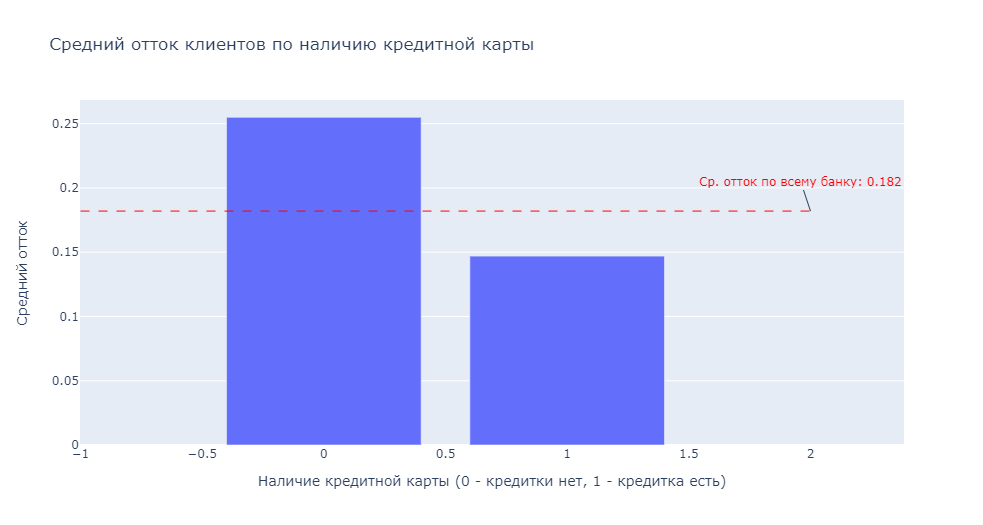

- **Выделяется больше всего средний отток у клиентов, у которых 4 продукта в банке и 7 или 9 очков собственности.**


- **Вероятно высокий отток клиентов с 4 продуктами связан с тем, что такие клиенты в начале использования банка из-за интереса открыли много продуктов, но затем ушли. Возможно их что-то не впечатлило или разочаровало в использований продуктов, но точную причину мы знать не можем.**


- **Клиенты у которых 1 продукт - стабильнее и меньше всего находятся в оттоке.**


- **Клиенты без кредитной карты чаще поддвержены оттоку. Вероятно из-за неинтереса к банку или условиям кредитки у них нет желания её открывать.**


- **Клиенты мужского пола в среднем больше склонны уходить в отток.**

### Исследовать зависимость оттока. Дополнительно изучить возможные зависимости всех столбцов группы оттока и группы клиентов, которые остались.

**Узнаем, на что влияет показатель оттока `churn`. Строим диаграмму корреляции по раннее созданному датафрейму `data_dummies`:**

In [28]:
# Из data_dummies создаём Series с одним столбцом churn, чтобы
# отображалась только корреляция churn с другими данными.
data_dummies_bar = ((data_dummies.corr().drop(index='churn'))['churn']).round(2)

# Заменяем значения корреляции для age и balance, так-как в data_dummies корреляция
# рассчитана с учётом заглушек.
# Удаляем некорректную корреляцию:
data_dummies_bar = data_dummies_bar.drop(index=['age', 'balance'])
# Считаем корреляцию в age без заглушек:
age_churn_corr = ((data.query('age != -1'))[['age', 'churn']].corr().iat[0, 1]).round(2)
# Считаем корреляцию в balance без заглушек:
balance_churn_corr = ((data.query('balance != -1'))[['balance', 'churn']].corr().iat[0, 1]).round(2)
# Вставляем корректные значения корреляции в data_dummies_bar:
data_dummies_bar.loc['age'] = age_churn_corr
data_dummies_bar.loc['balance'] = balance_churn_corr
# Сортируем данные:
data_dummies_bar = data_dummies_bar.sort_values()

"""GitHub не выводит графики plotly.express, вставлены скриншоты работы кода этой библиотеки."""
## Столбчатый график.
#fig = px.bar(data_dummies_bar,
#             color=data_dummies_bar,
#             text=data_dummies_bar,
#             title='Корреляция показателей с оттоком')
#fig.update_layout(xaxis_title='Показатели',
#                  yaxis_title='Коррялеция с оттоком')
#fig.show()

'GitHub не выводит графики plotly.express, вставлены скриншоты работы кода этой библиотеки.'

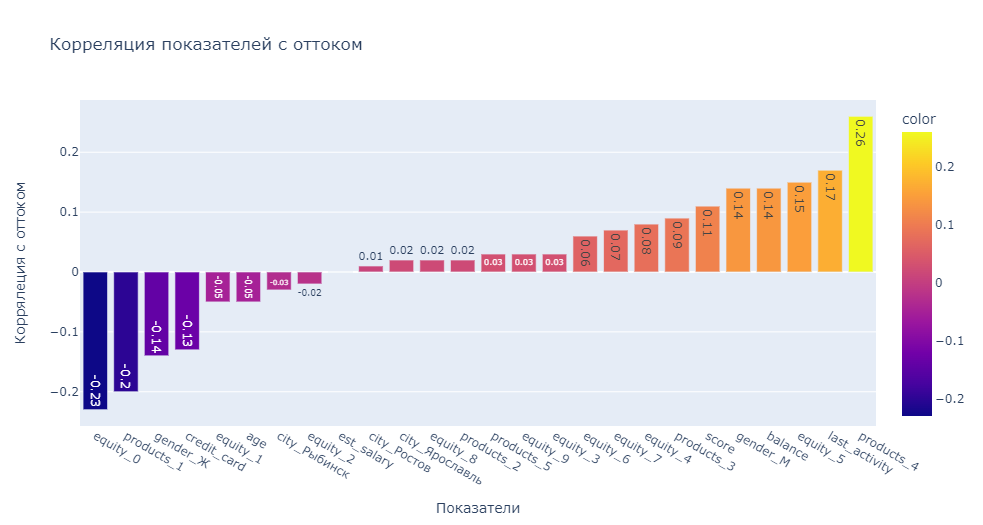

**Корреляция всех параметров с оттоком слабая, но наличие 4 продуктов больше всех и слабовыраженно влияет на отток из банка.**

**Посмотрим на возможные зависимости у клиентов оттока и остальных клиентов:**

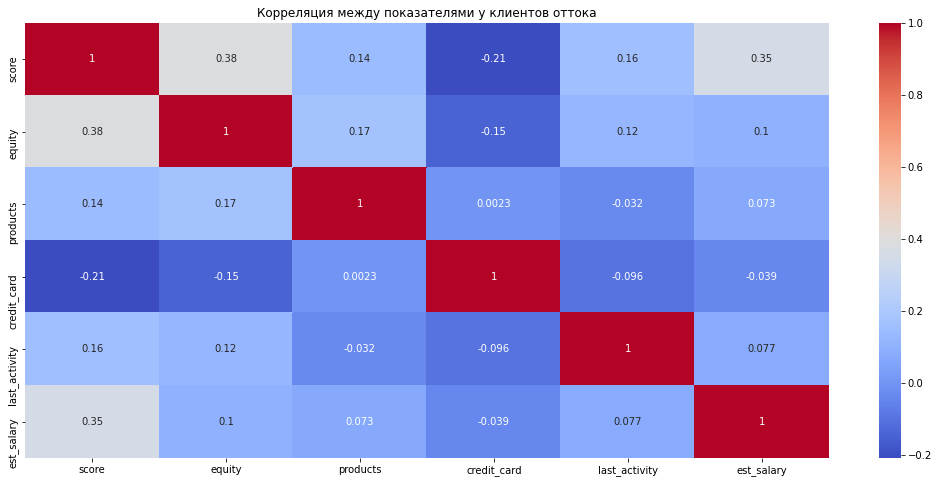

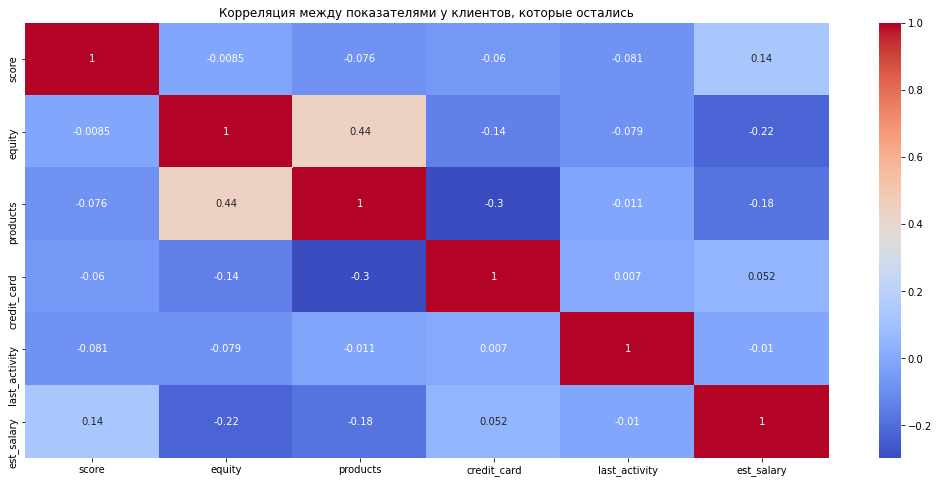

'GitHub не выводит графики plotly.express, вставлены скриншоты работы кода этой библиотеки.'

In [29]:
def correlation_by_nulls(data, column):
    """Функция для построения столбчатой диаграммы
    с корреляцией column по всем остальным параметрам
    кроме column и churm, удаляет в column значения -1.
    Принимает:
    - Датафрейм;
    - Название столбца для корреляции.
    """
    # Удаляем заглушки.
    data = data.loc[data[column] != -1]
    
    # Итерация вывода графика по каждой группе.
    for i in data['churn'].unique():
        # Составляем корреляцию column со всеми показателями, кроме churn
        # и самого column.
        matrix = ((data
                   .query('churn == @i')
                   .corr()
                   .drop(index=[column, 'churn']))[column]
                   .sort_values()
                   .round(2))
        
        # Название группы для описания графика.
        if i == 0:
            group = 'Группа оставшихся клиентов'
        if i == 1:
            group = 'Группа оттока'
        
        # Выводим график.
        fig = px.bar(matrix,
                     color=matrix,
                     text=matrix,
                     title=f'{group}: корреляция всех показетелей с {column}')
        fig.update_layout(xaxis_title='Показатели',
                          yaxis_title=f'Корреляция с {column}')
        fig.show()
        
    return None

# Построение матриц без balance и age.
corr_matrix_func(data.query('churn == 1').drop(columns=['churn', 'balance', 'age', 'city', 'gender']),
                 'Корреляция между показателями у клиентов оттока')
corr_matrix_func(data.query('churn == 0').drop(columns=['churn', 'balance', 'age', 'city', 'gender']),
                 'Корреляция между показателями у клиентов, которые остались')

"""GitHub не выводит графики plotly.express, вставлены скриншоты работы кода этой библиотеки."""
## Вызовы функции для построения диаграммы корреляции отдельно для balance и age,
## так-как у них изначально есть заглушки.
#correlation_by_nulls(data.drop(columns=['city', 'gender']), 'balance')
#correlation_by_nulls(data.drop(columns=['city', 'gender']), 'age')

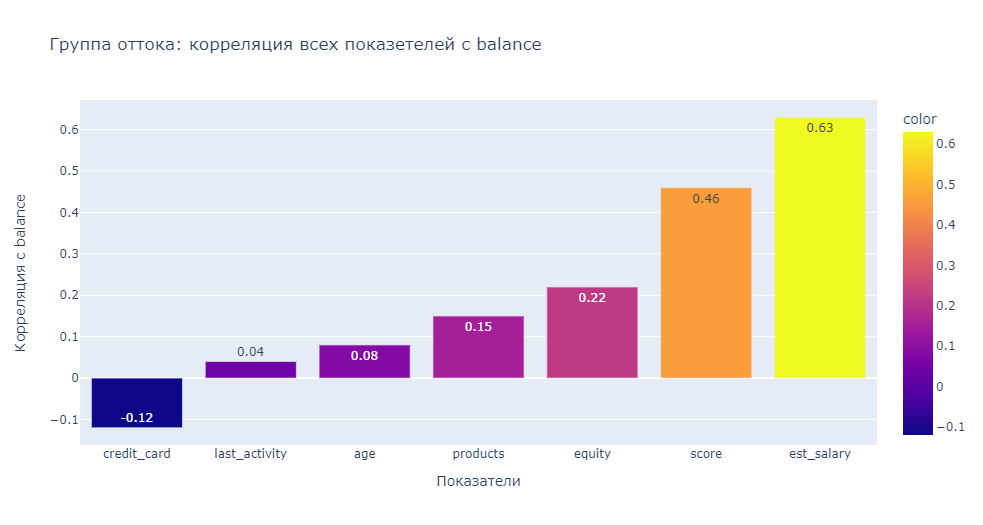

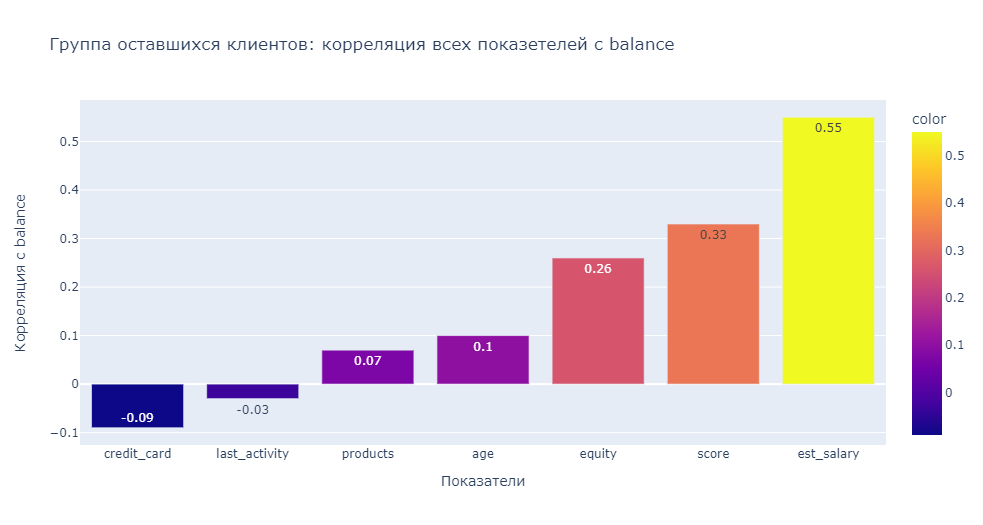

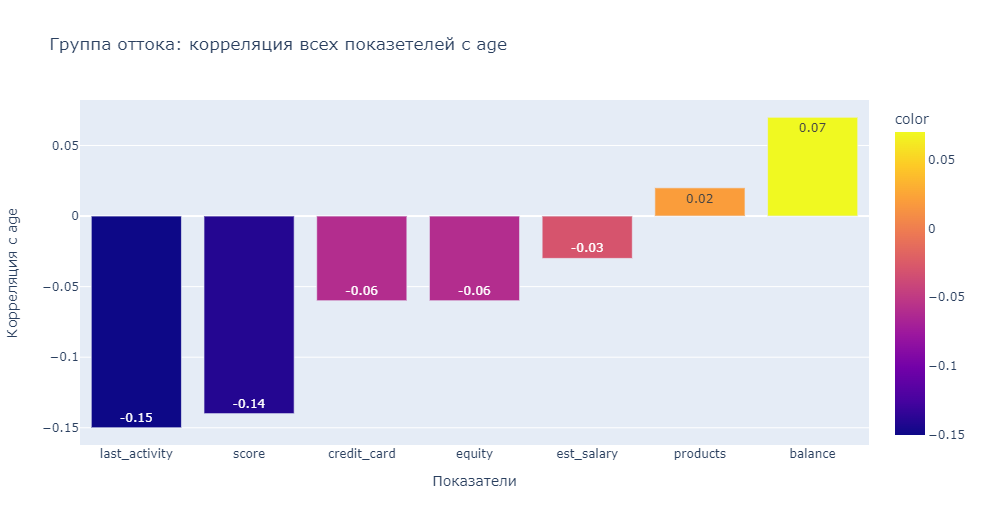

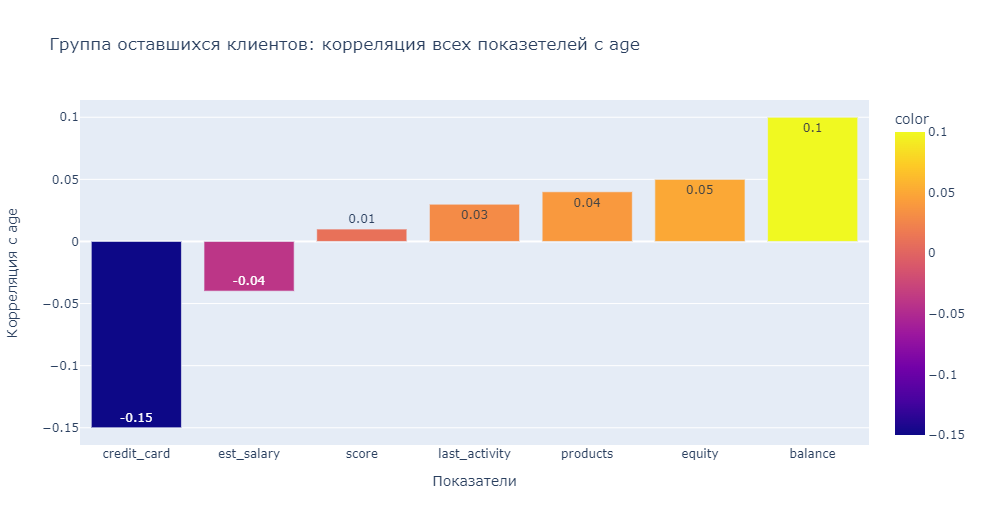

**Клиенты всех групп в разрезе оттока имеют средневыраженную корреляцию оценочного дохода и баланса.**

### Написать вывод по исследовательскому анализу данных.

- **Доля клиентов в оттоке: 18.19%;**


- **Распределение плотности оттока, превышающее распределение оставшихся клиентов, наблюдается по параметрам:**
    - **Баланс - от 750.000;**
    - **Баллы кредитного скоринга - от 825 до 900;**
    - **Возраст - от 25 до 35 и от 52 до 60;**
    - **Оценочный доход - от 100.000 до 215.000.**


- **Выделяется больше всего средний отток у клиентов, у которых 4 продукта в банке и 7 или 9 очков собственности;**


- **Клиенты у которых 1 продукт - стабильнее и в среднем меньше всего находятся в оттоке;**


- **Клиенты без кредитной карты в среднем чаще поддвержены оттоку. Вероятно из-за неинтереса к банку или условиям кредитки у них нет желания её открывать;**


- **Клиенты мужского пола в среднем больше склонны уходить в отток;**


- **Корреляция всех параметров с оттоком слабая, но наличие 4 продуктов больше всех и слабовыраженно влияет на отток из банка (корреляция = 0.26);**


- **Клиенты всех групп в разрезе оттока имеют средневыраженную корреляцию оценочного дохода и баланса.**

## Шаг 4. Проверка гипотез

### Рассчитать 99.5-й процентиль по всем данным отдельно по столбцам баланса и оценочной зарплаты, вырезать все строки со значениями выше них, сохранить такой датафрейм в отдельную переменную для проверки гипотез. Также вывести долю потери данных.

In [30]:
balance_percentile = np.percentile((data.query('balance != -1'))['balance'], 99.5).round(0)
est_salary_percentile = np.percentile(data['est_salary'], 99.5).round(0)

print('99.5-й процентиль баланса всего банка:', balance_percentile)
print('99.5-й процентиль оценочного дохода всего банка:', est_salary_percentile)

99.5-й процентиль баланса всего банка: 6678552.0
99.5-й процентиль оценочного дохода всего банка: 1024644.0


**Только меньше 0.5% клиентов имеют баланс и оценочный доход выше этих показетелей. Вырезаем их в отдельной переменной для проведений тестов `data_hypothesis`:**

In [31]:
data_hypothesis = data.query('balance <= @balance_percentile and est_salary <= @est_salary_percentile')

print('Доля потери данных при удалений редких клиентов, которые входят в 0.5% по высокому балансу или доходу:',
      (len(data) - len(data_hypothesis)) / len(data) * 100, '%')
print('')
print('Осталось клиентов в данных для проверки гипотез:', len(data_hypothesis))

Доля потери данных при удалений редких клиентов, которые входят в 0.5% по высокому балансу или доходу: 0.8103241296518607 %

Осталось клиентов в данных для проверки гипотез: 9915


### Тесты со сравнением долей:

#### Одинаковая ли доля наличия кредитных карт в группе "Оттока" и группе остальных клиентов? Визуализировать доли наличия кредитных карт по каждой группе.

**Во избежания проблемы подглядывания скорректируем уровень значимости, так-как будем проводить несколько тестов:**

In [32]:
alpha_corr = 0.05 / 6

**Это коррекция по методу Бонферрони, где изначальный уровень значимости (в нашем случае - 0.05) делится на количество тестов. Далее этот уровень коррекции будем применять в остальных тестах.**

**В наших данных имеется большая разница в количестве клиентов, по этому для проведения теста о различий долей применим точный тест Фишера. Формулировка гипотез:**

- **Нулевая гипотеза: Доля наличия кредитных карт у клиентов оттока = Доля наличия кредитных карт у оставшихся клиентов;**
- **Альтернативная гипотеза: Доля наличия кредитных карт у клиентов оттока ≠ Доля наличия кредитных карт у оставшихся клиентов.**

In [33]:
def fisher_part_test(data, column, alpha):
    """Функция для применения точного теста Фишера для
    определения различия статистической значимости в долях
    между группами churn = 1 и churn = 0.
    Принимает аргументы:
    - Датафрейм;
    - Название столбца (с булевыми значениями выполнения
    условия - 0 или 1);
    - Статистический уровень значимости.
    """
    # Подсчет количества пользователей, выполнивших условие по column в каждой группе.
    contingency_table = pd.crosstab(data['churn'], data[column])
    
    # Применение точного теста Фишера.
    odds_ratio, p_value = fisher_exact(contingency_table)

    print('P-value:', p_value)
    print('')
    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: разница в долях статистически значима.')
    else:
        print('Не отвергаем нулевую гипотезу: разница в долях НЕ стастически значима.')
    
    return None

# Группируем данные для визуализации.
credit_card_part = (data_hypothesis
                    .pivot_table(index='churn', values='credit_card', aggfunc='mean')
                    .reset_index()
                    .sort_values(by='credit_card'))
credit_card_part['churn'] = credit_card_part['churn'].replace({1: 'Отток', 0: 'Оставшийся клиент'})
credit_card_part['credit_card'] = (credit_card_part['credit_card']  * 100).round(2)

"""GitHub не выводит графики plotly.express, вставлены скриншоты работы кода этой библиотеки."""
## Столбчатая диаграмма с долями наличия кредитных карт.
#fig = px.bar(credit_card_part,
#             x='churn',
#             y='credit_card',
#             text='credit_card',
#             title='Доли наличия кредитных карт в разрезе оттока, выражено в %')
#fig.update_layout(xaxis_title='Клиенты в оттоке или остались',
#                  yaxis_title='Доля наличия кредитных карт в %')
#fig.show()

# Вызов функций теста Фишера.
fisher_part_test(data_hypothesis, 'credit_card', alpha_corr)

P-value: 1.677660543418825e-36

Отвергаем нулевую гипотезу: разница в долях статистически значима.


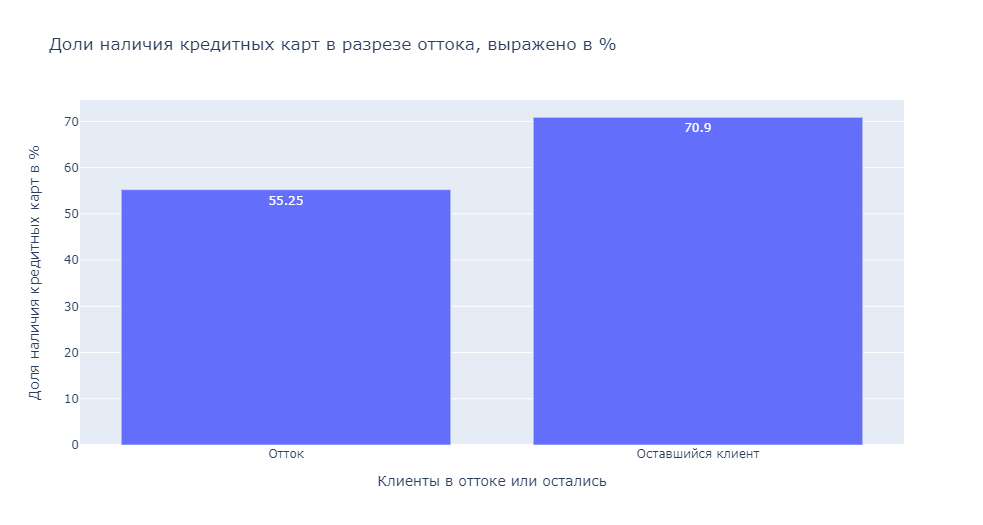

**Чаще всего кредитную карту имеют клиенты которые остались.**

### Тесты со сравнением среднего:

#### Одинаковый ли средний баланс клиентов между группой "Оттока" и остальными клиентами?

**Проверим, нормально ли распределен баланс клиентов двух групп:**

In [34]:
def hist_for_groups(data, column, title, x_title):
    """Функция для построения гистограмм в разрезе
    оттока (churn = 1 и 0), выводит на гистограммах
    среднее значение по каждой группе. Удаляет значения
    -1 по принимаемому столбцу column. Принимает:
    - Датафрейм;
    - Название колонки с распределением;
    - Подпись гистограммы;
    - Подпись оси X.
    """
    # Вырезаем заглушки.
    data = data.loc[data[column] != -1]
    
    # Находим среднее значение по двум группам.
    churn_mean = (data.query('churn == 1'))[column].mean().round(2)
    non_churn_mean = (data.query('churn == 0'))[column].mean().round(2)
    
    # Построение гистограммы.
    fig = px.histogram(data,
                       x=column,
                       color='churn',
                       barmode='overlay',
                       opacity=0.5,
                       title=title,
                       color_discrete_map={0: 'blue', 1: 'red'})
    fig.update_layout(xaxis_title=x_title,
                      yaxis_title='Кол-во клиентов',
                      legend_title='Разрез оттока')
    # Вертикальные линии со средними значениями.
    fig.add_vline(x=churn_mean,
                  line_dash='dash',
                  line_color='red',
                  annotation_text=f'Среднее оттока: {churn_mean}',
                  annotation_position='top right')
    fig.add_vline(x=non_churn_mean,
                  line_dash='dash',
                  line_color='blue',
                  annotation_text=f'Среднее НЕ оттока: {non_churn_mean}',
                  annotation_position='top right',
                  annotation_y=0.90)
    fig.show()
    
    return None

"""GitHub не выводит графики plotly.express, вставлены скриншоты работы кода этой библиотеки."""
## Вызов функций.
#hist_for_groups(data_hypothesis, 'balance', 'Распределение баланса в разрезе оттока', 'Баланс')

'GitHub не выводит графики plotly.express, вставлены скриншоты работы кода этой библиотеки.'

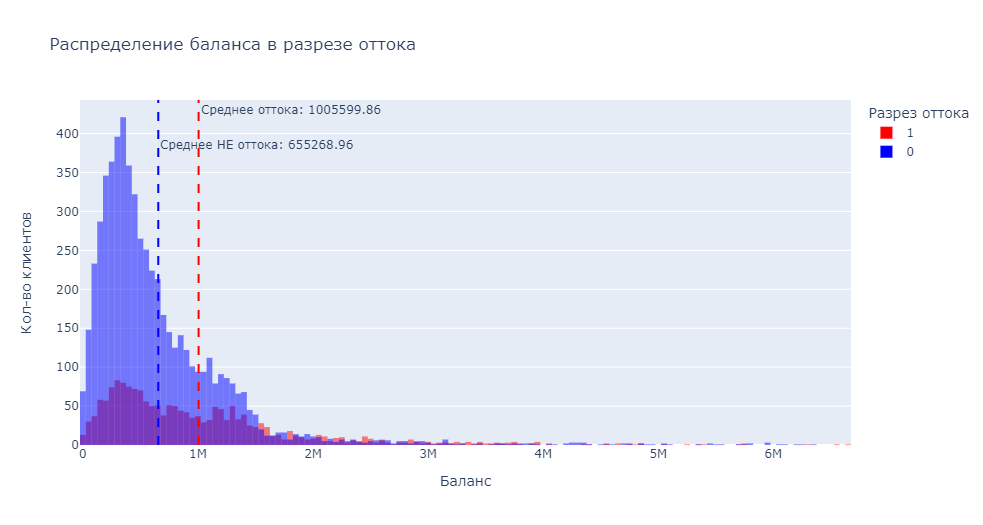

**Балансы распределены не нормально. С учётом большой разницы кол-ва клиентов групп и ненормального распределения применяем тест Манна-Уитни для сравнения среднего значения двух групп. Формулировка гипотез:**

- **Нулевая гипотеза: Средний баланс клиентов оттока = Средний баланс оставшихся клиентов;**
- **Альтернативная гипотеза: Средний баланс клиентов оттока ≠ Средний баланс оставшихся клиентов.**

In [35]:
def mannwhitneyu_mean_test(data, column, alpha):
    """Функция для проведения теста Манна-Уитни о
    равенстве среднего. Функция вырезает значения
    -1 в переданном аргументе column. Принимает:
    - Датафрейм;
    - Название столбца, по которому будет тест;
    - Статистический уровень значимости.
    """
    # Вырезаем заглушки.
    data = data.loc[data[column] != -1]
    
    # Разделение данных на две группы.
    group_a = (data.query('churn == 1'))[column]
    group_b = (data.query('churn == 0'))[column]

    # Применение теста.
    stat, p_value = mannwhitneyu(group_a, group_b)

    print('P-value:', p_value)
    print('')
    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: разница в среднем статистически значима.')
    else:
        print('Не отвергаем нулевую гипотезу: разница в среднем НЕ статистически значима.')

    return None

mannwhitneyu_mean_test(data_hypothesis, 'balance', alpha_corr)

P-value: 1.1972498177028978e-69

Отвергаем нулевую гипотезу: разница в среднем статистически значима.


**Исходя из теста и распределения баланса групп можем сказать, что средний баланс больше у группы оттока.**

#### Одинаковый ли средний оценочный доход клиентов между группой "Оттока" и остальными клиентами?

**Смотрим на распределение оценочного дохода групп:**

In [36]:
"""GitHub не выводит графики plotly.express, вставлены скриншоты работы кода этой библиотеки."""
#hist_for_groups(data_hypothesis,
#                'est_salary',
#                'Распределение оценочного дохода в разрезе оттока',
#                'Оценочный доход')

'GitHub не выводит графики plotly.express, вставлены скриншоты работы кода этой библиотеки.'

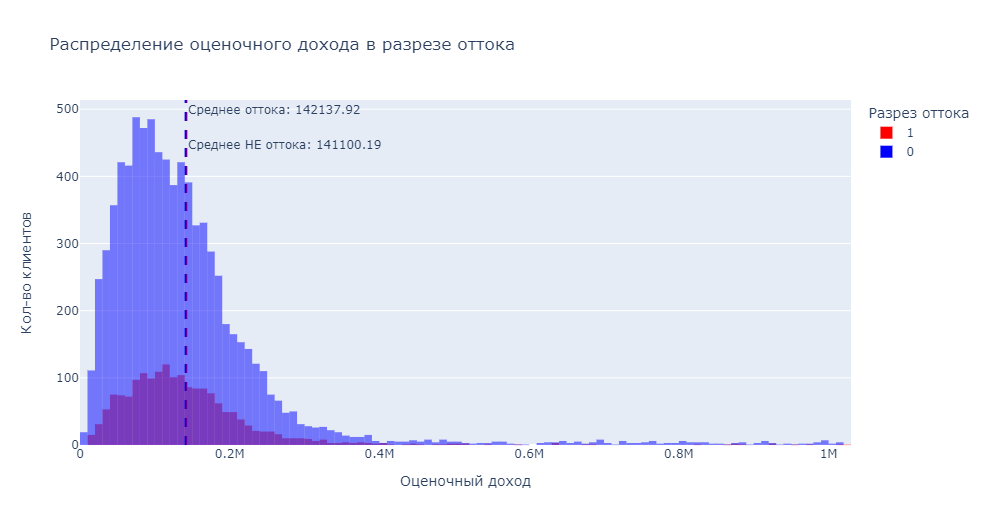

**Оценочные доходы распределены нормально, и похоже что нету различия между группами.**

**Чтобы определиться с тестом о равенстве среднего, необходимо провести тест о равенстве дисперсии, для этого применим тест Левена. Формулировка гипотез для проверки равенства дисперсии:**

- **Нулевая гипотеза: Дисперсия оценочного дохода клиентов оттока = Дисперсия оценочного дохода оставшихся клиентов;**
- **Альтернативная гипотеза: Дисперсия оценочного дохода клиентов оттока ≠ Дисперсия оценочного дохода оставшихся клиентов.**

In [37]:
def levene_dispersion_test(data, column, alpha):
    """Тест Левена о равенстве дисперсии
    между двумя группами. Принимает аргументы:
    - Датафрейм;
    - Название столбца, по которому будет проходить тест;
    - Статистический уровень значимости. 
    """
    # Разделение данных на две группы.
    group_a = (data.query('churn == 1'))[column]
    group_b = (data.query('churn == 0'))[column]
    
    # Проведение теста.
    stat, p_value = levene(group_a, group_b)
    
    print('P-value:', p_value)
    print('')
    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: разница в дисперсиях статистически значима.')
    else:
        print('Не отвергаем нулевую гипотезу: разница в дисперсиях НЕ статистически значима.')
    
levene_dispersion_test(data_hypothesis, 'est_salary', alpha_corr)

P-value: 0.0022969584330977985

Отвергаем нулевую гипотезу: разница в дисперсиях статистически значима.


**Так-как разница в дисперсиях значима, применяем тест Уэлча. Формулировка гипотез:**

- **Нулевая гипотеза: Средний оценочный доход клиентов оттока = Средний оценочный доход оставшихся клиентов;**
- **Альтернативная гипотеза: Средний оценочный доход клиентов оттока ≠ Средний оценочный доход оставшихся клиентов.**

In [38]:
def welch_mean_test(data, column, alpha):
    """Тест Уэлча для проверки равенства среднего.
    Принимает аргументы:
    - Датафрейм;
    - Название столбца, по которому будет проходить тест;
    - Статистический уровень значимости. 
    """
    # Разделение данных на две группы.
    group_a = (data.query('churn == 1'))[column]
    group_b = (data.query('churn == 0'))[column]
    
    # Проведение теста.
    stat, p_value = ttest_ind(group_a, group_b)
    
    print('P-value:', p_value)
    print('')
    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: разница в среднем статистически значима.')
    else:
        print('Не отвергаем нулевую гипотезу: разница в среднем НЕ статистически значима.')
    
welch_mean_test(data_hypothesis, 'est_salary', alpha_corr)

P-value: 0.7314181721736965

Не отвергаем нулевую гипотезу: разница в среднем НЕ статистически значима.


**Разницы в среднем оценочном доходе в разрезе оттока нет.**

#### Одинаковые ли средние баллы кредитного скоринга клиентов между группой "Оттока" и остальными клиентами?

**Смотри на распределение баллов кредитного скоринга по группам:**

In [39]:
"""GitHub не выводит графики plotly.express, вставлены скриншоты работы кода этой библиотеки."""
#hist_for_groups(data_hypothesis,
#                'score',
#                'Распределение баллов кредитного скоринга в разрезе оттока',
#                'Оценочный доход')

'GitHub не выводит графики plotly.express, вставлены скриншоты работы кода этой библиотеки.'

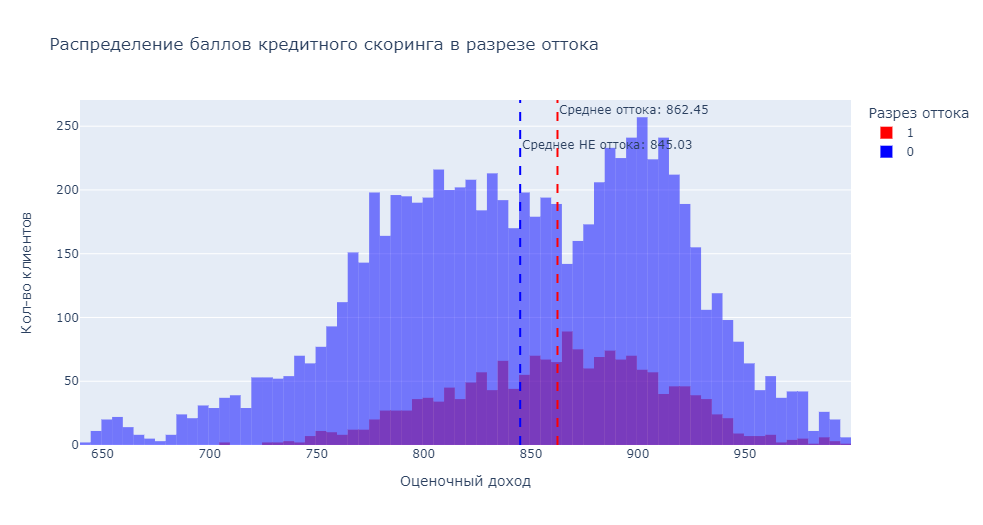

**Баллы кредитного скоринга распределены не нормально, снова применяем тест Манна-Уитни. Формулировка гипотез:**

- **Нулевая гипотеза: Средний кредитный скоринг оттока = Средний кредитный скоринг оставшихся клиентов;**
- **Альтернативная гипотеза: Средний кредитный скоринг оттока ≠ Средний кредитный скоринг оставшихся клиентов.**

In [40]:
mannwhitneyu_mean_test(data_hypothesis, 'score', alpha_corr)

P-value: 7.297159598574771e-21

Отвергаем нулевую гипотезу: разница в среднем статистически значима.


**Группы в разрезе оттока по средним баллам кредитного скоринга различны, в среднем у группы оттока больше баллов скоринга.**

### На усмотрение провести ещё тесты, если во время выполнений заданий возникнут дополнительные "намёки" на различия групп по явным или неявным параметрам.

**Раннее по исследованию корреляции с оттоком и средних показателей оттока со средним оттоком всего банка было выявлено, что наличие 4 продуктов может больше всего влиять на отток. Проведём тест.**

**Создаём новые столбцы в датафрейме `data_hypothesis` с булевыми значениями 0 или 1 по категориям продуктов в банке:**

In [41]:
data_hypothesis = pd.get_dummies(data_hypothesis, columns=['products'])

**Проверим гипотезу о равенстве долей наличия 4 продуктов в группе "Оттока" и группы остальных клиентов.**

**Так-как у нас имеется большая разница в количестве клиентов по группам, применим тест Фишера. Формулировка гипотез:**

- **Нулевая гипотеза: Доля наличия 4 продуктов у клиентов оттока = Доля наличия 4 продуктов у оставшихся клиентов;**
- **Альтернативная гипотеза: Доля наличия 4 продуктов у клиентов оттока ≠ Доля наличия 4 продуктов у оставшихся клиентов.**

In [42]:
# Группируем данные для визуализации.
four_products_part = (data_hypothesis
                      .pivot_table(index='churn', values='products_4', aggfunc='mean')
                      .reset_index()
                      .sort_values(by='products_4'))
four_products_part['churn'] = four_products_part['churn'].replace({1: 'Отток', 0: 'Оставшийся клиент'})
four_products_part['products_4'] = (four_products_part['products_4']  * 100).round(2)

"""GitHub не выводит графики plotly.express, вставлены скриншоты работы кода этой библиотеки."""
## Столбчатая диаграмма с долями наличия 4 продуктов.
#fig = px.bar(four_products_part,
#             x='churn',
#             y='products_4',
#             text='products_4',
#             title='Доли наличия 4 продуктов в разрезе оттока, выражено в %')
#fig.update_layout(xaxis_title='Клиенты в оттоке или остались',
#                  yaxis_title='Доля наличия 4 продуктов в %')
#fig.show()

# Вызываем функцию для проведения теста Фишера.
fisher_part_test(data_hypothesis, 'products_4', alpha_corr)

P-value: 5.2966298180920823e-110

Отвергаем нулевую гипотезу: разница в долях статистически значима.


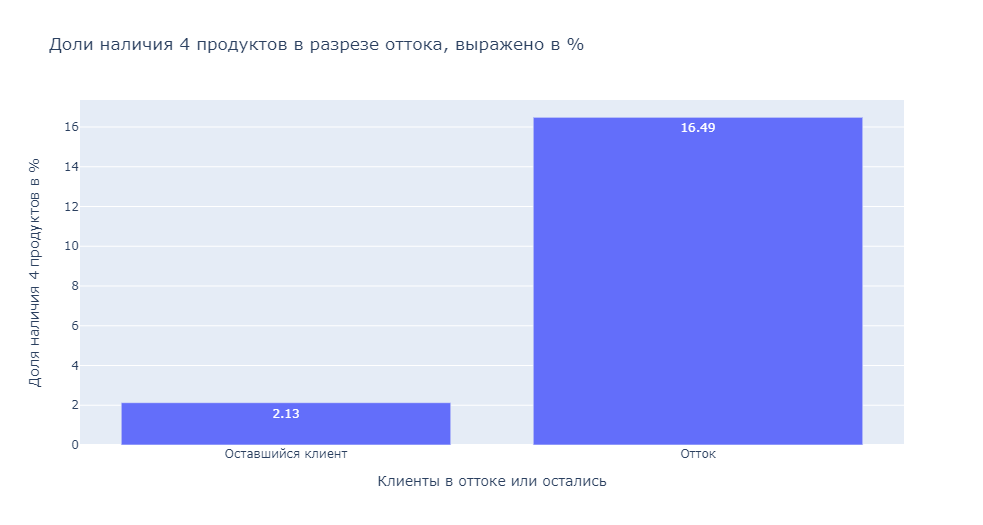

**В группе оттока наибОльшая доля наличия 4 продуктов. Вероятно наличие 4-х продуктов в банке влияет на отток, но точных причин этого мы знать не можем.**

### Написать вывод по проверке гипотез.

- **В датафрейме `data_hypothesis` для проверки гипотез были вырезаны клиенты, которые превышали 99.5-й процентиль по:**
    - **99.5-й процентиль баланса всего банка: 6678552.00;**
    - **99.5-й процентиль оценочного дохода всего банка: 1024644.00.**


- **Доля потери данных при удалений редких клиентов, которые входят в 0.5% по высокому балансу или доходу: 0.81%;**


- **Осталось клиентов в данных для проверки гипотез: 9915;**


- **Гипотеза о равенстве долей наличия кредитных карт в разрезе оттока:**
    - **Чаще всего кредитную карту имеют клиенты которые остались.**


- **Гипотеза о равенстве среднего баланса в разрезе оттока:**
    - **Исходя из теста и распределения баланса групп можем сказать, что средний баланс больше у группы оттока.**


- **Гипотеза о равенстве среднего оценочного дохода в разрезе оттока:**
    - **Разницы в среднем оценочном доходе в разрезе оттока нет.**


- **Гипотеза о равенстве средних баллов кредитного скоринга в разрезе оттока:**
    - **Группы в разрезе оттока по средним баллам кредитного скоринга различны, в среднем у группы оттока больше баллов скоринга.**


- **Гипотеза о равенстве долей наличия 4 продуктов в банке в разрезе оттока:**
    - **В группе оттока наибОльшая доля наличия 4 продуктов. Вероятно наличие 4-х продуктов в банке влияет на отток, но точных причин этого мы знать не можем.**

## Шаг 5. Подведение промежуточных итогов

### Составить промежуточный вывод на основе исследовательского анализа данных и проверки гипотез.


- **Распределение плотности оттока, превышающее распределение оставшихся клиентов, наблюдается по параметрам:**
    - **Баланс - от 750.000;**
    - **Баллы кредитного скоринга - от 825 до 900;**
    - **Возраст - от 25 до 35 и от 52 до 60;**
    - **Оценочный доход - от 100.000 до 215.000.**


- **Признаки, по которым в среднем отток больше, чем средний отток по всему бану:**
    - **Города: Ростов, Ярославль**
    - **Пол: Мужчины**
    - **Баллы собственности: от 3 до 9 включительно**
    - **Количество банковских продуктов: от 2 до 5 включительно**
    - **Отсутствие кредитной карты**


- **Гипотезы:**
    - **У оттока меньше доля наличия кредитных карт, чем у оставшихся клиентов;**
    - **Средний баланс клиентов оттока больше;**
    - **Средний оценочный доход в разрезе оттока не различается;**
    - **В среднем баллов кредитного скоринга больше у оттока;**
    - **В группе оттока наибОльшая доля наличия 4 продуктов. Вероятно наличие 4-х продуктов в банке влияет на отток, но точных причин этого мы знать не можем.**

## Шаг 6. Сегментация клиентов по признакам отточности

### Выбрать сегменты (от 500 клиентов на сегмент), по которым среднее количество оттока больше, чем в среднем оттока по банку.

**Формируем сегменты:**

In [43]:
# Средний отток по всему банку.
bank_churn_mean = data['churn'].mean().round(2)

# Сегмент по балансу от 750.000 и очкам собственности от 3.
segment_1_query = data.query('balance >= 750000 and equity >= 3')
segment_1_count = segment_1_query['score'].count()
segment_1_churn_mean = segment_1_query['churn'].mean().round(2)

# Сегмент без кредитных карт и оценочному доходу от 100.000.
segment_2_query = data.query('credit_card == 0 and est_salary >= 100000')
segment_2_count = segment_2_query['score'].count()
segment_2_churn_mean = segment_2_query['churn'].mean().round(2)

# Сегмент по Ярославлю и кол-ву продуктов от 3.
segment_3_query = data.query('city == "Ярославль" and products >= 2')
segment_3_count = segment_3_query['score'].count()
segment_3_churn_mean = segment_3_query['churn'].mean().round(2)

print(f'Клиентов в первом сегменте: {segment_1_count}, средний отток сегмента: {segment_1_churn_mean}')
print(f'Клиентов во втором сегменте: {segment_2_count}, средний отток сегмента: {segment_2_churn_mean}')
print(f'Клиентов в третьем сегменте: {segment_3_count}, средний отток сегмента: {segment_3_churn_mean}')
print('')
print(f'Средний отток по всему банку: {bank_churn_mean}')

Клиентов в первом сегменте: 2477, средний отток сегмента: 0.36
Клиентов во втором сегменте: 1895, средний отток сегмента: 0.3
Клиентов в третьем сегменте: 3853, средний отток сегмента: 0.26

Средний отток по всему банку: 0.18


**Клиентов в этих сегментах больше 500 и средний отток превышает средний по банку. Берём их.**

## Шаг 7. Приоритизация сегментов оттока

### Создать приоритет сегментов оттока, аргументировать созданный приоритет.

**Возьмём за приоритет медианный оценочный доход клиентов оттока - чем больше доход у клиента, тем больше он может приносить прибыль банку.**

In [44]:
# Считаем медианный оценочный доход.
segment_1_median = segment_1_query.query('churn == 1')['est_salary'].median().round(0)
segment_2_median = segment_2_query.query('churn == 1')['est_salary'].median().round(0)
segment_3_median = segment_3_query.query('churn == 1')['est_salary'].median().round(0)

# Строим график.
median_salary = np.array([segment_1_median, segment_2_median, segment_3_median])
segments_name = np.array(['Баланс от 750.000 рублей и от 3 очков собственности',
                          'Нет кредитной карты и оценочный доход от 100.000',
                          'Город Ярославль и кол-во продуктов в банке от 3'])
data_segments = pd.DataFrame(data={'segments': segments_name, 'median_salary': median_salary})

"""GitHub не выводит графики plotly.express, вставлены скриншоты работы кода этой библиотеки."""
#fig = px.bar(data_segments.sort_values(by='median_salary'),
#             x='median_salary',
#             y='segments',
#             text='median_salary',
#             title='Приоритет сегментов оттока по медианному оценочному доходу оттока')
#fig.update_layout(xaxis_title='Медианный оценочный доход клиентов оттока',
#                  yaxis_title='Сегменты с высоким средним оттоком')
#fig.show()

'GitHub не выводит графики plotly.express, вставлены скриншоты работы кода этой библиотеки.'

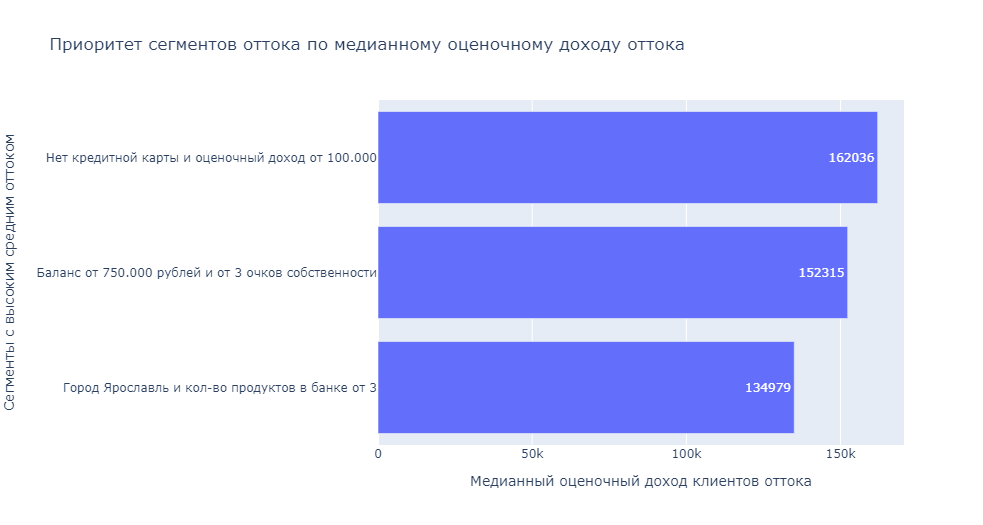

## Шаг 8. Рекомендации для сегментов оттока

### Создать рекомендации для работы с сегментами оттока.

- **Баланс от 750.000 рублей и от 3 очков собственности:**
    - **Более выгодные условия по залоговым кредитам;**
    - **Страхование имущества;**
    - **Оценка стоимости имущества;**
    - **Помощь в продаже имущества.**


- **Нет кредитной карты и оценочный доход от 100.000:**
    - **Ввести или увеличить беспроцентный период по кредитке;**
    - **Ввести или увеличить начисление кэшбэка/баллов по кредитке;**
    - **Сделать "рассрочку по кнопке", чтобы клиент платил по выбранной операции без процентов N-ый период.**


- **Город Ярославль и кол-во продуктов в банке от 3:**
    - **Провести проблемное интервью с клиентами, чтобы выявить боли;**
    - **Повысить кэшбэк/баллы;**
    - **Улучшение качества обслуживания в офисах банка.**

## Шаг 9. Создание презентации
### Создать презентацию в формате PDF-файла на основе выполненной работы.

**[Презентация](https://disk.yandex.ru/i/BdW8D4DlStEM4A)**

## Шаг 10. Вывод по проделанной работе


# Предобработка данных

- **Шрифт всех колонок `data` теперь змеиный;**


- **Найдены дубликаты по ID пользователей, скорее всего это ошибка при выгрузке данных или система назначила одинаковый ID клиентам, у которых есть совпадения в персональных данных. В данных явно видно, что клиенты с одинаковыми ID разные. Дубликаты были оставлены;**


- **Удалён столбец `userid`;**


- **Обработка пропусков:**
    - **`age` - Пропуски заменены на заглушку -1;**
    - **`balance` - Была найдена возможная закономерность пропусков, что они возникли у клиентов, у которых баллы собственности равны 0 или 1. Пропуски заменены на заглушку -1.**


- **Балансы свыше 40 миллионов создавали сильный разброс в данных и были удалены;**


- **Максимальные и минимальные значения по баллам скоринга и возрасту:**
    - **Минимальные баллы кредитного скоринга: 642**
    - **Максимальные баллы кредитного скоринга: 1000**
    - **Минимальный возраст клиентов: 18**
    - **Максимальный возраст клиентов: 86**


- **Изменён тип данных в `score` и `age` с float на int;**


- **С помощью метода get_dummies() была созданна вторая переменная с датафреймом `data_dummies`, где отдельные категории входят в столбцы с булевыми значениями;**


- **Удалены клиенты, которые не имели продуктов в банке;**


- **Доля потери данных при предобработке составила: 0.04%.**


# Исследовательский анализ данных

- **Доля клиентов в оттоке: 18.19%;**


- **Распределение плотности оттока, превышающее распределение оставшихся клиентов, наблюдается по параметрам:**
    - **Баланс - от 750.000;**
    - **Баллы кредитного скоринга - от 825 до 900;**
    - **Возраст - от 25 до 35 и от 52 до 60;**
    - **Оценочный доход - от 100.000 до 215.000.**


- **Выделяется больше всего средний отток у клиентов, у которых 4 продукта в банке и 7 или 9 очков собственности;**

- **Клиенты у которых 1 продукт - стабильнее и в среднем меньше всего находятся в оттоке;**


- **Клиенты без кредитной карты в среднем чаще поддвержены оттоку. Вероятно из-за неинтереса к банку или условиям кредитки у них нет желания её открывать;**


- **Клиенты мужского пола в среднем больше склонны уходить в отток;**


- **Корреляция всех параметров с оттоком слабая, но наличие 4 продуктов больше всех и слабовыраженно влияет на отток из банка (корреляция = 0.26);**


- **Клиенты всех групп в разрезе оттока имеют средневыраженную корреляцию оценочного дохода и баланса.**


# Проверка гипотез

- **В датафрейме `data_hypothesis` для проверки гипотез были вырезаны клиенты, которые превышали 99.5-й процентиль по:**
    - **99.5-й процентиль баланса всего банка: 6678552.00;**
    - **99.5-й процентиль оценочного дохода всего банка: 1024644.00.**


- **Доля потери данных при удалений редких клиентов, которые входят в 0.5% по высокому балансу или доходу: 0.81%;**


- **Осталось клиентов в данных для проверки гипотез: 9915;**


- **Гипотеза о равенстве долей наличия кредитных карт в разрезе оттока:**
    - **Чаще всего кредитную карту имеют клиенты которые остались.**


- **Гипотеза о равенстве среднего баланса в разрезе оттока:**
    - **Исходя из теста и распределения баланса групп можем сказать, что средний баланс больше у группы оттока.**


- **Гипотеза о равенстве среднего оценочного дохода в разрезе оттока:**
    - **Разницы в среднем оценочном доходе в разрезе оттока нет.**


- **Гипотеза о равенстве средних баллов кредитного скоринга в разрезе оттока:**
    - **Группы в разрезе оттока по средним баллам кредитного скоринга различны, в среднем у группы оттока больше баллов скоринга.**


- **Гипотеза о равенстве долей наличия 4 продуктов в банке в разрезе оттока:**
    - **В группе оттока наибОльшая доля наличия 4 продуктов. Вероятно наличие 4-х продуктов в банке влияет на отток, но точных причин этого мы знать не можем.**


# Промежуточный итог

- **Распределение плотности оттока, превышающее распределение оставшихся клиентов, наблюдается по параметрам:**
    - **Баланс - от 750.000;**
    - **Баллы кредитного скоринга - от 825 до 900;**
    - **Возраст - от 25 до 35 и от 52 до 60;**
    - **Оценочный доход - от 100.000 до 215.000.**


- **Признаки, по которым в среднем отток больше, чем средний отток по всему бану:**
    - **Города: Ростов, Ярославль**
    - **Пол: Мужчины**
    - **Баллы собственности: от 3 до 9 включительно**
    - **Количество банковских продуктов: от 2 до 5 включительно**
    - **Отсутствие кредитной карты**


- **Гипотезы:**
    - **У оттока меньше доля наличия кредитных карт, чем у оставшихся клиентов;**
    - **Средний баланс клиентов оттока больше;**
    - **Средний оценочный доход в разрезе оттока не различается;**
    - **В среднем баллов кредитного скоринга больше у оттока;**
    - **В группе оттока наибОльшая доля наличия 4 продуктов. Вероятно наличие 4-х продуктов в банке влияет на отток, но точных причин этого мы знать не можем.**


# Сегментация клиентов по признакам отточности

**Составлены сегменты от 500 клиентов, которые имеют средний отток выше, чем в среднем отток по всему банку.**


# Приоритезация сегментов

**Сегментам был задан приоритет по убыванию медианного оценочного дохода клиентов оттока.**


# Рекомендации для работы с сегментами

- **Баланс от 750.000 рублей и от 3 очков собственности:**
    - **Более выгодные условия по залоговым кредитам;**
    - **Страхование имущества;**
    - **Оценка стоимости имущества;**
    - **Помощь в продаже имущества.**


- **Нет кредитной карты и оценочный доход от 100.000:**
    - **Ввести или увеличить беспроцентный период по кредитке;**
    - **Ввести или увеличить начисление кэшбэка/баллов по кредитке;**
    - **Сделать "рассрочку по кнопке", чтобы клиент платил по выбранной операции без процентов N-ый период.**


- **Город Ярославль и кол-во продуктов в банке от 3:**
    - **Провести проблемное интервью с клиентами, чтобы выявить боли;**
    - **Повысить кэшбэк/баллы;**
    - **Улучшение качества обслуживания в офисах банка.**